## Tried and Tested Functions

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_points_as_image(points):
    """
    Plot points as an image.

    Parameters:
    - points: List of tuples (x, y) representing points.

    Returns:
    - None (displays the image).
    """
    # Create a blank image
    image = np.zeros((200, 200), dtype=np.uint8)

    # Mark points on the image
    for x, y in points:
        image[x, y] = 255  # Set pixel intensity to 255 (white)

    # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    center_x, center_y = 200 // 2, 200 // 2
    image[center_y, center_x] = 128
    # Display the image
    plt.imshow(image, cmap='gray', origin='upper')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Points as Image')
    plt.show()

def final_conversion(image_coordinates):
    """
    Convert a list of image coordinates to polar coordinates with origin at the center.

    Parameters:
    - image_coordinates: List of tuples (x, y) representing image coordinates.
    - image_shape: Tuple (height, width) representing the shape of the image.

    Returns:
    - List of tuples (r, theta) representing polar coordinates.
    """
    polar_dict = {}
    height, width = 200,200
    center_x, center_y = width // 2, height // 2

    # Step 1: Shift coordinates to center of the image
    shifted_coordinates = [(x - center_x, center_y - y) for x, y in image_coordinates]

    # Step 2: Convert shifted Cartesian coordinates to polar coordinates
    polar_coordinates = [(np.sqrt(x**2 + y**2), round((np.arctan2(y, x)),1)) for x, y in shifted_coordinates]
    distance = [r for r, _ in polar_coordinates]
    average_distance = np.mean(distance)
    std_dev = np.std(distance)
    median = np.median(distance)
    # Step 3: Check for duplicate theta, keep the smallest distance
    for r, theta in polar_coordinates:
        if theta in polar_dict:
            # If a duplicate theta is encountered, keep the point with the shortest distance
            if r < polar_dict[theta][0]:
                polar_dict[theta] = (r, theta)
        else:
            polar_dict[theta] = (r, theta)


    polar_coordinates = list(polar_dict.values())
    k = len(polar_coordinates)
    # Step 4: Convert to Cartesian.
    cartesian_coordinates = [[round(r * np.cos((theta))), round(r * np.sin((theta)))] for r, theta in polar_coordinates]
    # Step 5: Shift back
    cartesian_coordinates = [(int(x+center_x), int(center_y - y)) for x, y in cartesian_coordinates]
    return cartesian_coordinates, polar_coordinates, shifted_coordinates

def plot_two_points_as_image(points1, points2):
    """
    Plot points as an image.

    Parameters:
    - points: List of tuples (x, y) representing points.

    Returns:
    - None (displays the image).
    """
    # Create a blank image
    image = np.zeros((200, 200), dtype=np.uint8)

    # Mark points on the image
    for x, y in points1:
        image[x, y] = 100  # Set pixel intensity to 255 (white)
    
    for x,y in points2:
        image[x,y] = 255

    # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    # Display the image
    plt.imshow(image, cmap='gray', origin='upper')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Points as Image')
    plt.show()

    return image


l = [[16, 113], [16, 115], [17, 113], [17, 115], [18, 113], [18, 115], [19, 113], [20, 112], [21, 112], [22, 112], [23, 112], [23, 114], [24, 112], [24, 114], [25, 112], [25, 114], [26, 112], [26, 114], [27, 112], [27, 114], [34, 116], [34, 117], [34, 118], [35, 116], [35, 118], [36, 116], [36, 118], [37, 115], [37, 118], [38, 115], [38, 118], [39, 115], [39, 118], [40, 115], [40, 118], [41, 115], [41, 118], [41, 121], [42, 116], [42, 118], [42, 122], [43, 116], [43, 118], [43, 120], [43, 123], [44, 116], [44, 119], [44, 123], [44, 124], [45, 118], [45, 124], [46, 118], [46, 124], [47, 118], [47, 125], [48, 118], [48, 125], [49, 118], [49, 125], [50, 119], [50, 126], [51, 119], [51, 120], [51, 126], [52, 120], [52, 127], [53, 120], [53, 127], [54, 121], [54, 127], [54, 129], [55, 121], [55, 129], [56, 122], [56, 129], [57, 122], [57, 129], [58, 122], [58, 130], [59, 123], [59, 130], [59, 131], [60, 123], [60, 124], [60, 131], [61, 124], [61, 131], [62, 125], [62, 132], [63, 125], [63, 132], [64, 126], [64, 133], [65, 126], [65, 133], [66, 126], [66, 133], [67, 127], [67, 134], [68, 127], [68, 134], [69, 128], [69, 134], [70, 128], [70, 134], [71, 128], [71, 134], [72, 128], [72, 134], [73, 128], [73, 134], [74, 129], [74, 135], [75, 129], [75, 135], [76, 129], [76, 135], [77, 129], [77, 135], [78, 129], [78, 135], [79, 129], [79, 135], [80, 129], [80, 135], [81, 129], [81, 135], [82, 130], [82, 135], [83, 130], [83, 136], [84, 130], [84, 136], [85, 131], [85, 137], [86, 131], [86, 137], [87, 131], [87, 137], [88, 131], [88, 138], [89, 131], [89, 139], [90, 131], [90, 140], [91, 132], [91, 140], [92, 132], [92, 141], [93, 133], [93, 141], [93, 142], [94, 133], [94, 143], [95, 133], [95, 144], [96, 134], [96, 145], [97, 134], [97, 135], [97, 146], [98, 135], [98, 147], [99, 136], [99, 148], [100, 136], [100, 148], [100, 149], [101, 136], [101, 149], [101, 150], [102, 136], [102, 151], [102, 152], [103, 137], [103, 152], [104, 137], [104, 152], [105, 137], [105, 152], [106, 137], [106, 152], [107, 137], [107, 152], [108, 137], [108, 152], [109, 137], [109, 152], [110, 138], [110, 152], [111, 138], [111, 151], [112, 139], [112, 151], [113, 139], [113, 140], [113, 141], [113, 142], [113, 143], [113, 151], [114, 144], [114, 145], [114, 146], [114, 147], [114, 148], [114, 151], [115, 148], [115, 149], [115, 150]]

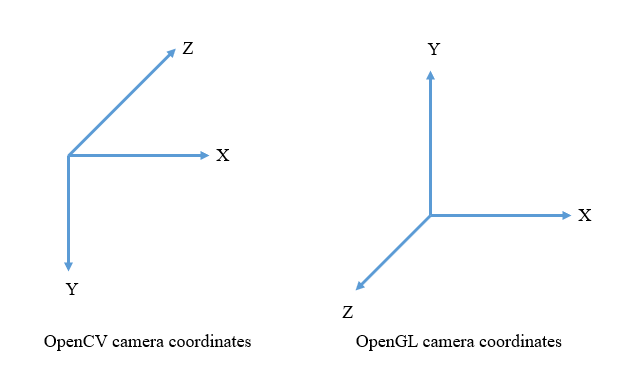

#### Initial Image

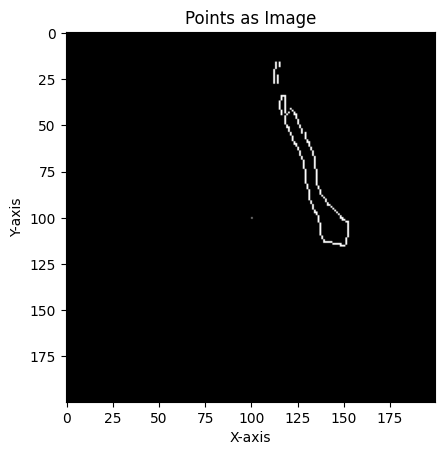

In [29]:
image = plot_points_as_image(l)

#### Edge Detection

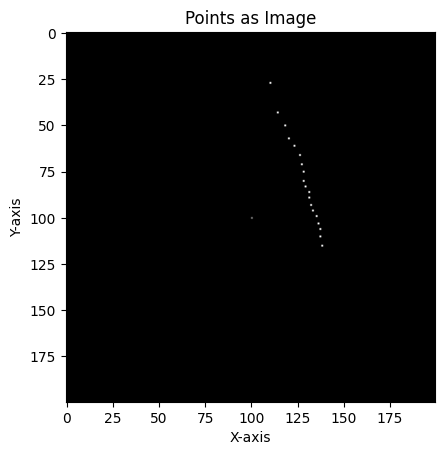

In [30]:
j ,polar, shifted = final_conversion(l)
plot_points_as_image(j)

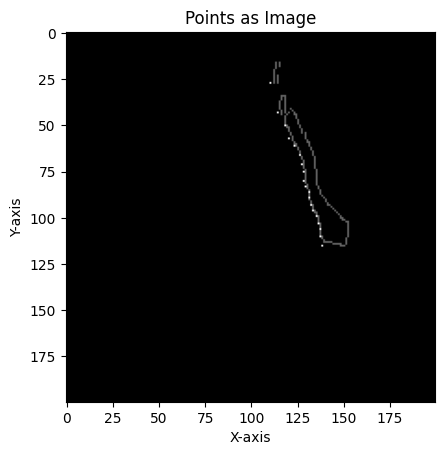

In [31]:
##BASELINE
baseline = plot_two_points_as_image(l ,j)

## Plot in vx frame

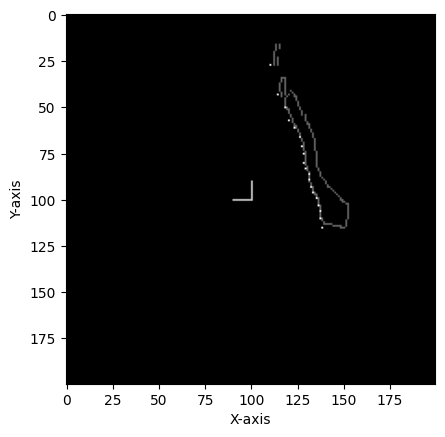

In [32]:
def plot_two_points_as_image_vx_f(points1, points2):
    """
    Plot points as an image.

    Parameters:
    - points: List of tuples (x, y) representing points.

    Returns:
    - None (displays the image).
    """
    # Create a blank image
    image = np.zeros((200, 200), dtype=np.uint8)

    # Mark points on the image
    for x, y in points1:
        image[x, y] = 100  # Set pixel intensity to 255 (white)
    
    for x,y in points2:
        image[x,y] = 255

    # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    center_x, center_y = 200 // 2, 200 // 2
    image[center_x, center_y] = 255

    image = cv2.line(image, (center_x, center_y), (center_x, center_y-10), 200, 1)
    image = cv2.line(image, (center_x, center_y), (center_x-10, center_y), 200, 1) 

    # Display the image
    plt.imshow(image, cmap='gray', origin='upper')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


plot_two_points_as_image_vx_f(l,j)

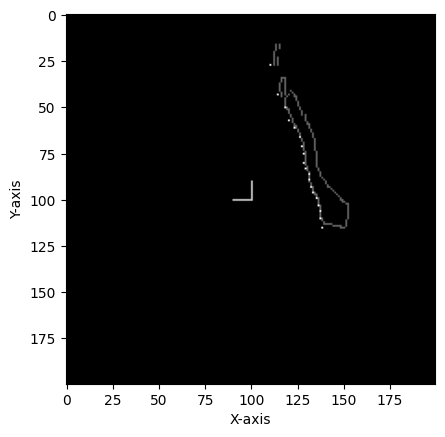

In [72]:
yawd_p = [list(t) for t in polar]

theta = 0
for points in yawd_p:
    points[1] = points[1] + np.float64(theta)
cartesian_coordinates = [[round(r * np.cos((theta))), round(r * np.sin((theta)))] for r, theta in yawd_p]
# Step 5: Shift back
cartesian_coordinates = [(int(x+100), int(100 - y)) for x, y in cartesian_coordinates]
cartesian_vx = cartesian_coordinates
plot_two_points_as_image_vx_f(l,cartesian_coordinates)

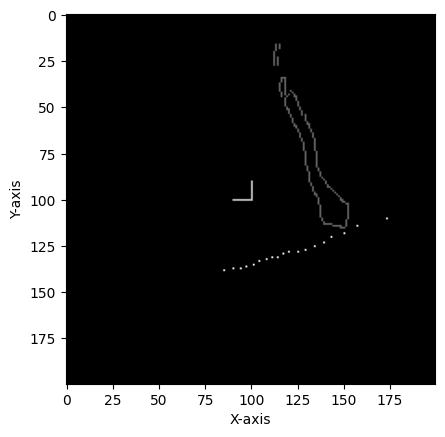

### Curve Fitting

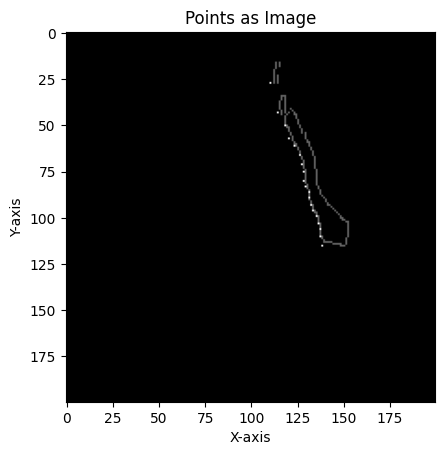

In [41]:
baseline = plot_two_points_as_image(l ,j)

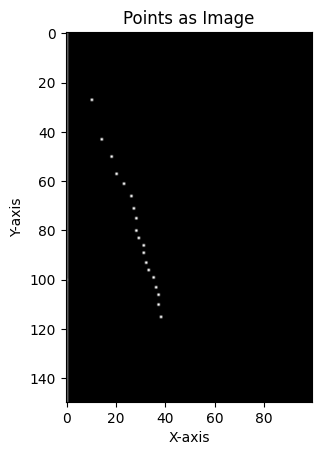

In [99]:
def find_cordinates_max_value(image):
        """
        Find cordinates of white pixels
        """
        max_intensity = np.max(image)

        # Get the coordinates of pixels with the maximum intensity
        max_intensity_coordinates = np.column_stack(np.where(image == max_intensity))

        return max_intensity_coordinates

def plot_points_as_image_dev(points):
    """
    Plot points as an image.

    Parameters:
    - points: List of tuples (x, y) representing points.

    Returns:
    - None (displays the image).
    """
    # Create a blank image
    image = np.zeros((200, 200), dtype=np.uint8)
    
    image = cv2.line(image, (0, 3*200//4), (200, 3*200//4), 100, 1)
    image = cv2.line(image, (100, 0), (100, 200), 100, 1)

       # Mark points on the image
    for x, y in points:
        image[x, y] = 255  # Set pixel intensity to 255 (white)
    # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    center_x, center_y = 200 // 2, 200 // 2
    image[center_y, center_x] = 128
    image_cropped = image[:3*200//4, center_x:]
    # Display the image
    plt.imshow(image_cropped, cmap='gray', origin='upper')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Points as Image')
    plt.show()

    return image_cropped

img_cropped = plot_points_as_image_dev(cartesian_vx) #(0,100)->(200,100)
img_cropped_cart = find_cordinates_max_value(img_cropped)

In [97]:
img_cropped_cart

array([[ 27,  10],
       [ 43,  14],
       [ 50,  18],
       [ 57,  20],
       [ 61,  23],
       [ 66,  26],
       [ 71,  27],
       [ 75,  28],
       [ 80,  28],
       [ 83,  29],
       [ 86,  31],
       [ 89,  31],
       [ 93,  32],
       [ 96,  33],
       [ 99,  35],
       [103,  36],
       [106,  37],
       [110,  37],
       [115,  38]])